In [87]:
#importing all the necessary packages
import pandas as pd
import os
import matplotlib.pyplot as plt

In [88]:
#Data Preparation
## 1. Merging the data of each month to CSV file
lists=[]
for i in os.listdir('CSV'):
    j='CSV/'+i
    lists.append(pd.read_csv(j))
#concating the list to dataframe
df = pd.concat(lists)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  float64
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  float64
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  168370 non-null  object 
 6   Unnamed: 5        17580 non-null   object 
dtypes: float64(3), object(4)
memory usage: 11.4+ MB


In [90]:
###Droping the extra column formed during concat process
df=df.drop(['Unnamed: 5'],axis=1)

In [91]:
##knowing the number of rows and columns of the dataframe
df.shape

(186850, 6)

In [92]:
##visualizing the top five rows of the dataframe
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558.0,USB-C Charging Cable,2.0,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559.0,Bose SoundSport Headphones,1.0,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560.0,Google Phone,1.0,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560.0,Wired Headphones,1.0,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [93]:
##Checking the total null value present in each colunm of data
df.isnull().sum()

Order ID              900
Product               900
Quantity Ordered      900
Price Each            900
Order Date            900
Purchase Address    18480
dtype: int64

In [94]:
##Removing the null values from the data
df = df.dropna()

In [95]:
#Confirming whether the null values are removed or not
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [96]:
#checking for the duplicate entries in the dataframe
df.duplicated().sum()

235

In [97]:
#removing the duplicate rows and keeping the first one
df=df.drop_duplicates()
df.shape

(168135, 6)

In [98]:
#confirming whether the duplicate values are removed or not
df.duplicated().sum()

0

In [99]:
##Converting quantity ordered and price each to numeric
#checkinh the datatypes of all the column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168135 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          168135 non-null  float64
 1   Product           168135 non-null  object 
 2   Quantity Ordered  168135 non-null  float64
 3   Price Each        168135 non-null  float64
 4   Order Date        168135 non-null  object 
 5   Purchase Address  168135 non-null  object 
dtypes: float64(3), object(3)
memory usage: 9.0+ MB


In [100]:
#converting in to integer datatype
df['Quantity Ordered'] = df['Quantity Ordered'].astype('int')
df['Price Each'] = df['Price Each'].astype('int')

In [101]:
#checking the inforation of columns after datatype conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168135 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          168135 non-null  float64
 1   Product           168135 non-null  object 
 2   Quantity Ordered  168135 non-null  int32  
 3   Price Each        168135 non-null  int32  
 4   Order Date        168135 non-null  object 
 5   Purchase Address  168135 non-null  object 
dtypes: float64(1), int32(2), object(3)
memory usage: 7.7+ MB


In [102]:
##Creating a new column Month from Ordered Date and converting it to integer
df.iloc[0]['Order Date']

'4/19/2019 8:46'

In [103]:
#initializing empty list and appending the month in the list by converting the order date to list
li=[]
for i in df['Order Date']:
    j=i.split('/')
    li.append(j[0])
df['month']=li

In [104]:
#converting the month datatype to int
df['month'] = df['month'].astype('int')

In [105]:
df['month']

0        4
2        4
3        4
4        4
5        4
        ..
11681    9
11682    9
11683    9
11684    9
11685    9
Name: month, Length: 168135, dtype: int32

In [106]:
#analizing the value of purchase address by obtaining address of first row
df.iloc[0]['Purchase Address']

'917 1st St, Dallas, TX 75001'

In [107]:
##Creating a new column named City from Purchase Address. 
##ceeating function to convert address to list and extracting the city names and making a column
city=[]
for i in df['Purchase Address']:
    city.append(i.split(',')[1])
df['city']=city

In [108]:
df.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,city
0,176558.0,USB-C Charging Cable,2,11,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4,Dallas


In [109]:
#Data Analysis
df['Price Each'].describe()

count    168135.000000
mean        184.131496
std         333.309763
min           2.000000
25%          11.000000
50%          14.000000
75%         150.000000
max        1700.000000
Name: Price Each, dtype: float64

In [110]:
#calculating sum of all the values in the "Price Each" column
df['Price Each'].sum()

30958949

In [111]:
#calculating mean of "Price Each" column
df['Price Each'].mean()

184.13149552442977

In [112]:
#calculating standard deviation of "Price Each" column
df['Price Each'].std()

333.3097632654414

In [113]:
#calculating skewness of "Price Each" column
df['Price Each'].skew()

2.8645003224268595

In [114]:
#calculating kurtosis of "Price Each" column
df['Price Each'].kurtosis()

9.04594357835616

In [115]:
#calculating the total sales in each order
df['sales']=df['Quantity Ordered']*df['Price Each']

In [116]:
#showing correlation between all variables using traditional pandas method
df.corr()

C:\Users\avish\AppData\Local\Temp\ipykernel_33320\3609258901.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Order ID,Quantity Ordered,Price Each,month,sales
Order ID,1.000000,0.000125,-0.001916,0.992548,-0.002017
Quantity Ordered,0.000125,1.000000,-0.148680,0.000215,-0.141023
Price Each,-0.001916,-0.148680,1.000000,-0.002416,0.999178
month,0.992548,0.000215,-0.002416,1.000000,-0.002514
sales,-0.002017,-0.141023,0.999178,-0.002514,1.000000


In [117]:
##month that has highest sales
#grouping the dataframe by month and obtaining sum of sales
#sorting the data to get the month with highest sales
monthly_sales=df.groupby('month')['sales'].sum().reset_index().sort_values(by='sales', ascending=False)

In [118]:
##Showing the dataframe monthly_sales values
monthly_sales

,month,sales
11,12,4583921
9,10,3717286
3,4,3373517
4,5,3136309
2,3,2791960
6,7,2634145
5,6,2564680
7,8,2230826
1,2,2189767
8,9,2084353


In [119]:
#extracting the first row of the dataframe to get the month that has highest sales
monthly_sales.iloc[0]

month         12
sales    4583921
Name: 11, dtype: int64

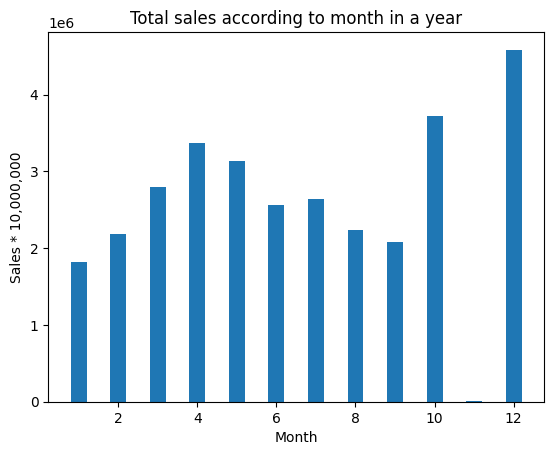

In [120]:
#plotting bar graph of month and sales
plt.bar(monthly_sales['month'],monthly_sales['sales'],width=0.4)
plt.xlabel("Month")
plt.ylabel("Sales * 10,000,000")
plt.title("Total sales according to month in a year")
plt.show()

In [121]:
##city that sold the highest product
#grouping the dataframe by city and obtaining sum of sales
#sorting the data to get the city with highest sales
city_sales=df.groupby('city')['sales'].sum().reset_index().sort_values(by='sales', ascending=False)

In [122]:
city_sales

,city,sales
7,San Francisco,7456141
4,Los Angeles,4924169
5,New York City,4214022
2,Boston,3292492
0,Atlanta,2507660
3,Dallas,2505821
8,Seattle,2481912
6,Portland,2102161
1,Austin,1639000


In [123]:
#extracting the first row of the dataframe to get the city that has highest sales
city_sales.iloc[0]

city      San Francisco
sales           7456141
Name: 7, dtype: object

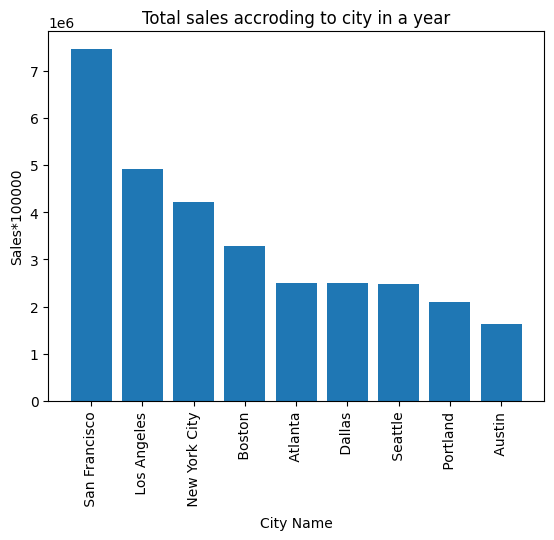

In [124]:
#bar plot showing sales accroding to city
plt.bar(city_sales['city'],city_sales['sales'])
plt.xticks(rotation='vertical')
plt.xlabel("City Name")
plt.ylabel("Sales*100000")
plt.title("Total sales accroding to city in a year")
plt.show()

In [125]:
##Most Sold products 
#first the dataframe was grouped according to the product name and
#sum of quantity ordered was obtained and the values were sorted in descending order
product_sales=df.groupby('Product')['Quantity Ordered'].sum().reset_index().sort_values(by='Quantity Ordered', ascending=False)

In [126]:
product_sales

,Product,Quantity Ordered
5,AAA Batteries (4-pack),27963
4,AA Batteries (4-pack),24986
15,USB-C Charging Cable,21684
12,Lightning Charging Cable,20959
17,Wired Headphones,18592
6,Apple Airpods Headphones,14128
7,Bose SoundSport Headphones,12182
2,27in FHD Monitor,6824
18,iPhone,6183
1,27in 4K Gaming Monitor,5661


In [127]:
#extracting the first row of the dataframe to get the highest sold product
product_sales.iloc[0]

Product             AAA Batteries (4-pack)
Quantity Ordered                     27963
Name: 5, dtype: object

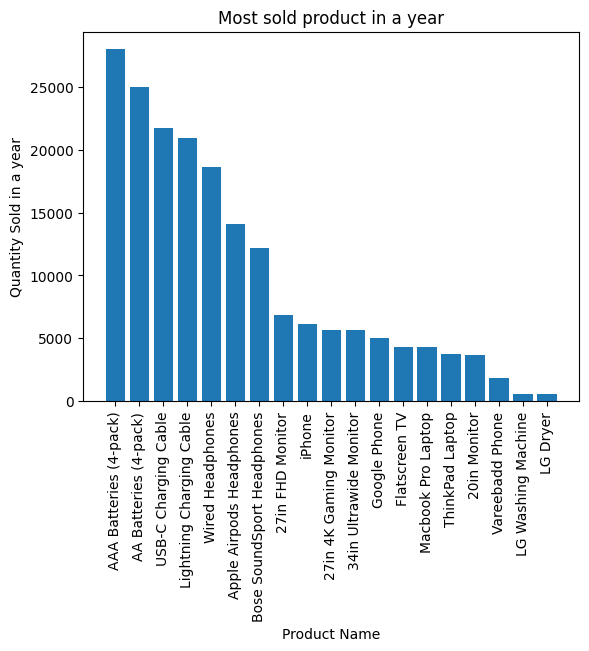

In [128]:
#bar plot showing of product and quantity sold in a year
plt.bar(product_sales['Product'],product_sales['Quantity Ordered'])
plt.xticks(rotation='vertical')
plt.xlabel("Product Name")
plt.ylabel("Quantity Sold in a year")
plt.title("Most sold product in a year")
plt.show()

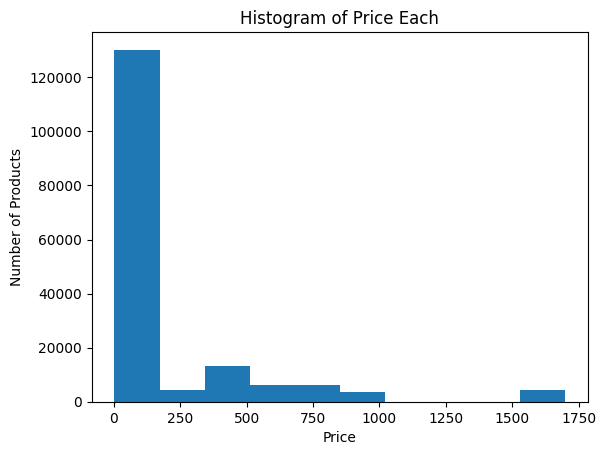

In [129]:
#hist plot of variable Price each
plt.hist(df['Price Each'])
plt.title("Histogram of Price Each")
plt.ylabel("Number of Products")
plt.xlabel("Price")
plt.show()